In [10]:
from sagemaker import get_execution_role
import boto3
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

role=get_execution_role()


In [8]:
import pickle
my_bucket = 'cogni-nlp-bucket'
my_file = 'results/words.pickle'
s3client = boto3.client('s3')
response = s3client.get_object(Bucket=my_bucket, Key=my_file)
body = response['Body']

data = pickle.loads(body.read())

['Indian',
 'Mutiny',
 ',',
 'call',
 'Sepoy',
 'Mutiny',
 'War',
 'Independence',
 ',',
 'widespread',
 'unsuccessful',
 'rebellion',
 'british',
 'rule',
 'India',
 '1857–59',
 '.',
 'Begun',
 'Meerut',
 'indian',
 'troop',
 '(',
 'sepoy',
 ')',
 'service',
 'British',
 'East',
 'India',
 'Company',
 ',',
 'spread',
 'Delhi',
 ',',
 'Agra',
 ',',
 'Kanpur',
 ',',
 'Lucknow',
 '.',
 'India',
 'call',
 'War',
 'Independence',
 'similar',
 'name',
 '.',
 '\r\n   ',
 'regard',
 'rebellion',
 'merely',
 'sepoy',
 'mutiny',
 'underestimate',
 'root',
 'cause',
 'lead',
 '.',
 'british',
 'paramountcy',
 '—',
 'i.e.',
 ',',
 'belief',
 'british',
 'dominance',
 'indian',
 'political',
 ',',
 'economic',
 ',',
 'cultural',
 'life',
 '—',
 'introduce',
 'India',
 '1820',
 '.',
 'british',
 'increasingly',
 'variety',
 'tactic',
 'usurp',
 'control',
 'Hindu',
 'princely',
 'state',
 'call',
 'subsidiary',
 'alliance',
 'british',
 '.',
 'old',
 'indian',
 'aristocracy',
 'replace',
 'british'

In [11]:
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

CPU times: user 57 ms, sys: 7.53 ms, total: 64.6 ms
Wall time: 36 ms


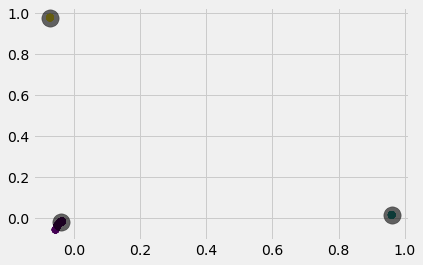

In [16]:
n_clusters = 3
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600, algorithm = 'auto')
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6);